# Importing necessary libraries and classifier algorithms

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("Skyserver_12_30_2019 4_49_58 PM.csv")
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,3978.727640,301.0,3.274010,187.243080,2.913905e+18,0.170621,2587.984270,53913.908690,341.699080
std,7.264931e+12,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,1691.498597,0.0,1.621208,141.037298,2.488872e+18,0.437571,2210.547391,1547.244489,217.068614
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.356526,6.770380,18.212902,16.852982,16.196607,15.865275,15.619960,2826.000000,301.0,2.000000,85.000000,1.335426e+18,0.000001,1186.000000,52733.000000,160.000000
50%,1.237662e+18,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,3900.000000,301.0,3.000000,153.000000,2.354330e+18,0.045997,2091.000000,53726.000000,328.000000
75%,1.237667e+18,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,5061.000000,301.0,5.000000,249.000000,3.276384e+18,0.095429,2910.000000,54585.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [5]:
data_resample = data
data_resample.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Visualizing data

Text(0.5, 1.0, 'Records per class')

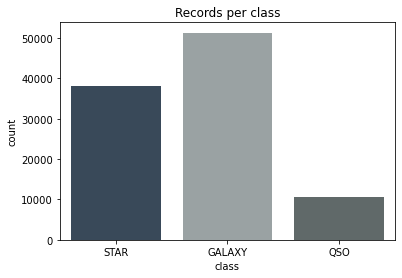

In [13]:
ax = sns.countplot(x="class", data=data_resample, palette=['#34495E',"#99A3A4", "#5F6A6A"])
star = data[data['class']=='STAR']
galaxy = data[data['class']=='GALAXY']
qso = data[data['class']=='QSO']
galaxy = data_resample.sample(qso['class'].count())
ax.set_title('Records per class')

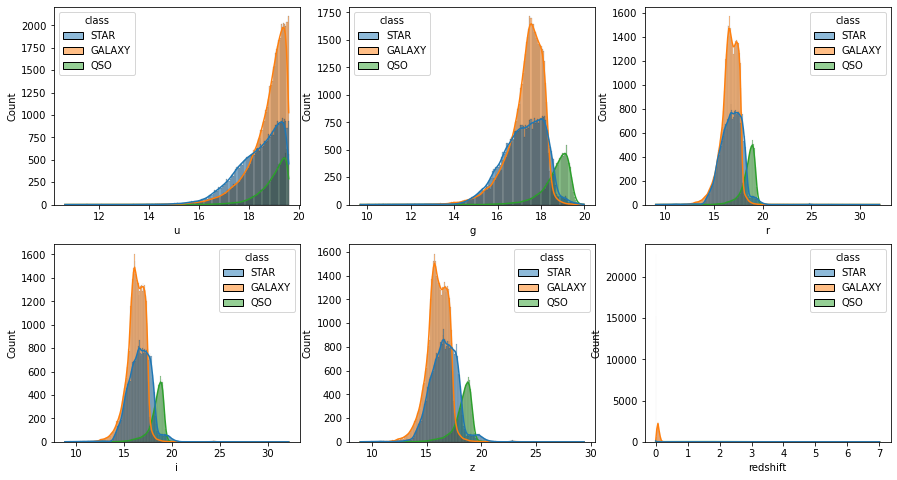

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=data_resample, x="u", hue="class", kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(data=data_resample, x="g", hue="class", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_resample, x="r", hue="class", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data_resample, x="i", hue="class", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=data_resample, x="z", hue="class", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_resample, x="redshift", hue="class", kde=True, color="teal", ax=axs[1, 2])
plt.show()

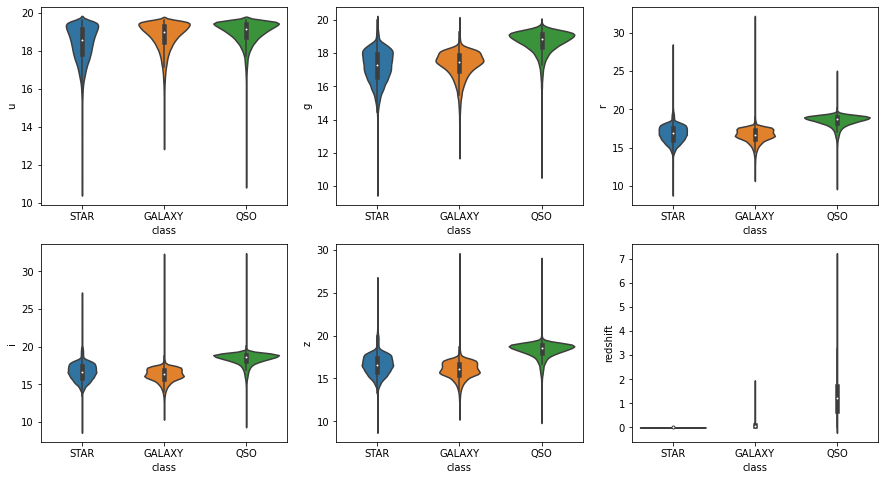

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.violinplot(x="class", y="u", data=data_resample, ax=axs[0, 0])
sns.violinplot(x="class", y="g", data=data_resample, ax=axs[0, 1])
sns.violinplot(x="class", y="r", data=data_resample, ax=axs[0, 2])
sns.violinplot(x="class", y="i", data=data_resample, ax=axs[1, 0])
sns.violinplot(x="class", y="z", data=data_resample, ax=axs[1, 1])
sns.violinplot(x="class", y="redshift", data=data_resample, ax=axs[1, 2])
plt.show()

In [8]:
X = data.drop(['class'], axis=1).values
y = data['class'].values

# Train Test Split 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 100000
Total # of sample in train dataset: 60000
Total # of sample in validation dataset: 20000
Total # of sample in test dataset: 20000


# Scaling the data

In [10]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training and Testing different models

In [21]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=300, max_features='log2', 
                                                     class_weight={'GALAXY': 1, 'QSO': 10, 'STAR': 1}),
    'Neural Nets': MLPClassifier(alpha=1e-5,  max_iter=400, random_state=23, hidden_layer_sizes=(150,125,100,75), 
                                 activation = 'relu', solver='adam'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'SupportVectorMachine': SVC()
}

modelNames = ['RandomForestClassifier', 'Neural Nets', 'DecisionTreeClassifier', 'LogisticRegression', 'SupportVectorMachine']
trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    
    print(f'{m}') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")
    
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)

    print(f'Confussion Matrix: \n{conf_matrix}\n')

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
    print("")
   
    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

C:\Users\Acer\AppData\Local\Temp/ipykernel_27384/3120895284.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier
Train score of trained model: 100.0
Validation score of trained model: 51.4
Test score of trained model: 98.825
 
Confussion Matrix: 
[[10142   155     7]
 [   30  1979     0]
 [   42     1  7644]]

Accuracy : 0.9849666829189013
Precision: 0.9273664479850047
Recall   : 0.9850671976107516
F1 score : 0.9553463673666426
Specificity : 0.9849470719627076

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.99     10304
         QSO       0.93      0.99      0.96      2009
        STAR       1.00      0.99      1.00      7687

    accuracy                           0.99     20000
   macro avg       0.97      0.99      0.98     20000
weighted avg       0.99      0.99      0.99     20000



############################################################################





C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Neural Nets
Train score of trained model: 99.58
Validation score of trained model: 37.79
Test score of trained model: 98.08
 
Confussion Matrix: 
[[9971   74   65]
 [  76 2060    1]
 [ 167    1 7585]]

Accuracy : 0.9876857400870208
Precision: 0.9653233364573571
Recall   : 0.9644194756554307
F1 score : 0.9648711943793912
Specificity : 0.9926331508213041

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     10110
         QSO       0.96      0.96      0.96      2137
        STAR       0.99      0.98      0.98      7753

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Validation score of trained model: 49.38
Test score of trained model: 98.63499999999999
 
Confussi

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression
Train score of trained model: 96.22166666666668
Validation score of trained model: 10.81
Test score of trained model: 96.14
 
Confussion Matrix: 
[[9872  230  196]
 [  29 1903    2]
 [ 313    2 7453]]

Accuracy : 0.9784776466677746
Precision: 0.8921706516643225
Recall   : 0.9849896480331263
F1 score : 0.9362853628536285
Specificity : 0.9772322312413384

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.96      0.96     10298
         QSO       0.89      0.98      0.94      1934
        STAR       0.97      0.96      0.97      7768

    accuracy                           0.96     20000
   macro avg       0.94      0.97      0.95     20000
weighted avg       0.96      0.96      0.96     20000



############################################################################





C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SupportVectorMachine
Train score of trained model: 97.58666666666667
Validation score of trained model: 37.79
Test score of trained model: 97.32
 
Confussion Matrix: 
[[9913  127   94]
 [  27 1995    1]
 [ 274   13 7556]]

Accuracy : 0.9872326314044105
Precision: 0.9401508011310085
Recall   : 0.9866468842729971
F1 score : 0.9628378378378378
Specificity : 0.9873505976095618

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     10134
         QSO       0.93      0.99      0.96      2023
        STAR       0.99      0.96      0.98      7843

    accuracy                           0.97     20000
   macro avg       0.96      0.98      0.97     20000
weighted avg       0.97      0.97      0.97     20000



############################################################################



